In [87]:
# import library
import matplotlib.pyplot as plt
import cv2
import numpy

In [88]:
class image:
    data:numpy.array
    height:int
    width:int
    N:int

    def __init__(self, img_path) -> None:
        self.data = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB)
        self.height, self.width, _ = self.data.shape
        self.N = self.height        # N * N image only.

    def encode(self, times=1):       # Shuffle times default to 1
        prev_data = self.data
        encoded_data = numpy.zeros(shape=self.data.shape)      # create new image
        for time in range(times):
            for x in range(self.height):
                for y in range(self.width):
                    new_x = (1 * x + 1 * y) % self.N
                    new_y = (1 * x + 2 * y) % self.N
                     
                    encoded_data[new_x, new_y, :] = prev_data[x, y, :]

            prev_data = encoded_data
    
        return encoded_data.astype('uint8')


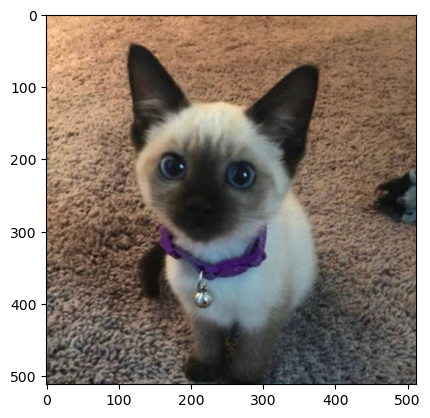

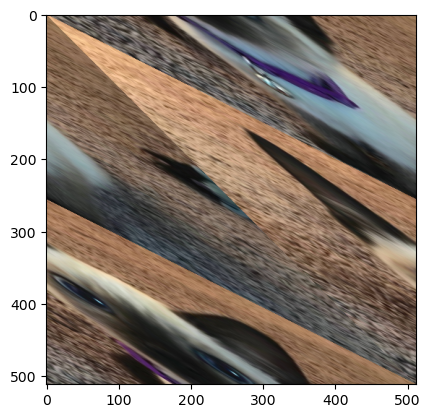

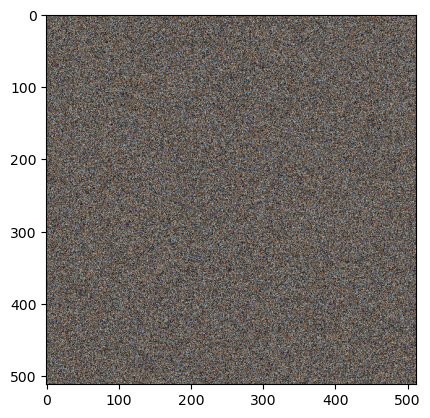

In [89]:
cat = image("cat256.png")
plt.figure(1)
plt.imshow(cat.data)

plt.figure(2)
plt.imshow(cat.encode(1))

plt.figure(3)
plt.imshow(cat.encode(192))


